Fradulent Activities Detection
------------------------------
Goal
----
Being able to identify fradulent activities on the E-commerce websites using machine learning. The goal is to build a model that predicts the probability of whether the first transcation of a new user is fradulent or not.
Dataset
-------
Information about the user first transaction on the site, and you have to make your classification (fraud/not fraud).

Tasks
-----
1. For each user, determine the country based on the numeric IP address (IpAddress_to_Country.csv)
2. Build a model to predict whether an activity is fradulent or not. Explain how different assumptions about the cost of false positive v.s. false negative would impact the model.
3. Explain your model to your supervisor clearly, from a user perspective. What are the characteristics of users who are more likely to be classified as a fraud?
4. Suppose that this model can be used live to predict in real time. From a product perspective, how would you use it?

Task1:
------

In [603]:
import pandas
import pandasql
import numpy as np
import os
cwd = os.getcwd()
print cwd

/Users/yuchengtsai/Documents/Fraud/Fraud


In [604]:
df1 = pandas.read_csv('/Users/yuchengtsai/Documents/Fraud/Fraud_Data.csv')
df2 = pandas.read_csv('/Users/yuchengtsai/Documents/Fraud/IpAddress_to_Country.csv')

In [605]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [606]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [607]:
df3 = df1.sample(n = 10000) # random sample 

In [608]:
import time
t1 = time.time()
q = """
SELECT *
FROM df3
INNER JOIN df2
ON df2.lower_bound_ip_address <=df3.ip_address AND df2.upper_bound_ip_address >= df3.ip_address
"""
t2 = time.time()
print "time:\t",t2-t1
sol1 = pandasql.sqldf(q.lower(),locals())
sol1.head()

time:	0.000164031982422


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States


In [609]:
print "number of N/A:"
print sol1.isnull().sum()
print "number of joint data:\t",len(sol1)

number of N/A:
user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
number of joint data:	8595


Task2:
------
Feature engineering is one of the most important steps for machine learning. Before building a model, I will start looking at a few obvious features:
- Time difference between signup time and purchase time
- Whether each device has a unique user
- Whether each device has mulitple ip_address
- 

In [610]:
# count number of user from each country
q = """
SELECT country, COUNT(country)
FROM sol1
GROUP BY country;
"""
sol2 = pandasql.sqldf(q.lower(),locals())
sol2.head()

,country,count(country)
0,Albania,1
1,Algeria,4
2,Angola,3
3,Argentina,42
4,Australia,113


In [664]:
sort = sol2.sort_values('count(country)',ascending=False)
sort.head(n=51)

,country,count(country)
120,United States,3847
21,China,783
58,Japan,508
119,United Kingdom,305
62,Korea Republic of,291
42,Germany,239
18,Canada,215
39,France,205
15,Brazil,190
56,Italy,149


Below I am trying to keep the top 50 coutries and set the remaining as others

In [707]:
df_country['country']=sort['country'][sort['count(country)']<=11]
len(df_country)

76

In [710]:
others=pandas.Series(data=df_country)
print len(others)
print len(string)

76
76


In [728]:
others=pandas.Series(data=df_country.as_matrix)
#others=list(df_country)
#print df_country['country']
#others=df_country['country'].as_matrix
string=['others']*len(df_country)
string = list(string)
string =pandas.Series(data=string)
df_country.replace(others,string,axis=1)
#print df_others
print type(others)

TypeError: replace() takes no keyword arguments

Task3: Create New Features
-------------------
**Time difference between sign-up time and purcase time**

In [612]:
#signup_DT = sol1['signup_time']
#purchase_DT = sol1['purchase_time']
sol1['delta'] = sol1['purchase_time'].astype('datetime64[ns]')-sol1['signup_time'].astype('datetime64[ns]')
#convert value in "delta" to seconds
sol1['delta']=sol1['delta'].apply(lambda x: x.total_seconds())


#signup_p= signup_DT.str.split(' ') #parse the date time
#sol1['signup_date'] = signup_p.str[0]
#sol1['sign_t'] = signup_p.str[1]
sol1.head()

#purchase_p = purchase_DT.str.split(' ')


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States,6913932.0
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States,2587789.0
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China,4326359.0
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan,8301137.0
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States,8123222.0


In [613]:
print len(sol1['delta'])

8595


** How many users in an unique device **

In [614]:
# check for each device id how many different users had it
q="""
SELECT device_id, COUNT(user_id)
FROM sol1
GROUP BY device_id
"""
sol3 = pandasql.sqldf(q.lower(),locals())
sol3.head()
print "how many unique device_id\t", len(sol3)
print "maximum users per unique device_id\t",sol3['count(user_id)'].max()


how many unique device_id	8415
maximum users per unique device_id	5


For each individual device, there are maximum 3 different users on it, which is suspecious and will be an important features to look at.

In [615]:
sort = sol3.sort_values('count(user_id)',ascending=False)
sort.head()

,device_id,count(user_id)
3725,LQOVYJCFDDWKF,5
824,CIZXYZIFQIGEN,4
7150,WFFMMTLLVICQX,4
1283,DRDPARLYVZOZM,4
2096,GKWRWEYCHNKKV,4


Now, let me rename the count of a unique device_id to "share_device"

In [616]:
df_share_device = sol3
df_share_device.rename(columns={'count(user_id)':'share_device'},inplace=True)
df_share_device.head()

,device_id,share_device
0,AAAXXOZJRZRAO,2
1,AABOMYDURXEQT,1
2,AABVEORDXZXUO,1
3,AACBIMMVQIFWW,1
4,AADSJJXNALPUV,1


**How many Frauds in the data**

In [617]:
# check number of fraud, class =1
q ="""
SELECT class, COUNT(class)
FROM sol1
GROUP BY class
"""

sol4 = pandasql.sqldf(q.lower(),locals())
sol4.head()
print "how many frauds in the sampling data\t",sol4['count(class)'].min()

how many frauds in the sampling data	810


In [618]:
print 'number of total users in the dataset:\t', len(df1)
print 'number of total users randomly sampled:\t', len(df3)
print 'fraction of frauds among all users:\t', (float(sol4['count(class)'].min()))/float(len(sol1))


number of total users in the dataset:	151112
number of total users randomly sampled:	10000
fraction of frauds among all users:	0.0942408376963


**How many users in an unique IP address**

In [619]:
# check for each ip address and how many users have it?
q ="""
SELECT ip_address, count(user_id)
FROM sol1
GROUP BY ip_address
"""
sol5 = pandasql.sqldf(q.lower(),locals())
sol5.head()

print "max users for a unique ip address\t",sol5['count(user_id)'].max()


max users for a unique ip address	5


In [620]:
sort = sol5.sort_values('count(user_id)',ascending=False)
sort.head()

,ip_address,count(user_id)
8195,3.666645e+09,5
1479,6.541804e+08,4
3770,1.687041e+09,4
2097,9.506140e+08,4
1036,4.708974e+08,4


In [621]:
df_share_ip=sol5
df_share_ip.rename(columns={'count(user_id)':'share_ip'},inplace=True)
df_share_ip.head()

,ip_address,share_ip
0,1.728964e+07,1
1,1.751369e+07,1
2,1.804111e+07,1
3,1.819146e+07,1
4,1.917588e+07,1


I am going to join the "share_device", and "share_ip" to the existing so1 DataFrame because these are important features for further analysis

In [622]:
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States,6913932.0
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States,2587789.0
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China,4326359.0
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan,8301137.0
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States,8123222.0


In [623]:
# inner join device_id 
q="""
SELECT *
FROM sol1
INNER JOIN  df_share_device
ON df_share_device.device_id = sol1.device_id
"""
sol1 = pandasql.sqldf(q.lower(),locals())
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,device_id,share_device
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States,6913932.0,IXHSTQAZFXDTY,1
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States,2587789.0,UTWVKEIJEMAQM,1
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China,4326359.0,KAVOOFOSDUPNX,1
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan,8301137.0,GJFPCLIVPVYIL,1
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States,8123222.0,ADYGRRYSXMEWS,1


In [624]:
# inner join ip_address
q="""
SELECT *
FROM sol1
INNER JOIN df_share_ip
ON df_share_ip.ip_address = sol1.ip_address
"""
sol1=pandasql.sqldf(q.lower(),locals())
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,ip_address,share_ip
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States,6913932.0,1,6.838873e+08,1
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States,2587789.0,1,3.519141e+09,1
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China,4326359.0,1,3.727999e+09,1
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan,8301137.0,1,1.037074e+09,1
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States,8123222.0,1,3.595471e+09,1


In [625]:
print len(sol1)

8595


Feature Selection
-----------------
The features that I will use to compare againt the class are:
- share_device
- share_ip
- time_float
- source_Direct
- browser_Chrome
- browser_IE
- Source_SEO
- sex_M
- sex_F

To determine which features are more important, I will use the following algorithms:
- Phi correlation for nominal (class) vs. nominal (source,browser,sex) data http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
- Point-Biserial correlation for nominal (class) vs. quantitative data (purchase_value,age,time_diff) REF: https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm

In addtion, I need to make categorical data for ['source','browser', 'sex', 'country'] using dummy variables.

**Categorial data**

In [626]:
sol1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,delta,share_device,ip_address,share_ip
0,382056,2015-05-18 11:50:10,2015-08-06 12:22:22,25,IXHSTQAZFXDTY,SEO,IE,M,30,6.838873e+08,0,6.836716e+08,687865855,United States,6913932.0,1,6.838873e+08,1
1,333963,2015-05-19 19:49:29,2015-06-18 18:39:18,42,UTWVKEIJEMAQM,SEO,Chrome,M,49,3.519141e+09,0,3.519119e+09,3519152127,United States,2587789.0,1,3.519141e+09,1
2,311264,2015-06-29 21:02:26,2015-08-18 22:48:25,26,KAVOOFOSDUPNX,Ads,IE,F,26,3.727999e+09,0,3.726639e+09,3728736255,China,4326359.0,1,3.727999e+09,1
3,92789,2015-03-22 07:27:36,2015-06-26 09:19:53,44,GJFPCLIVPVYIL,SEO,Chrome,M,26,1.037074e+09,0,1.037042e+09,1037565951,Japan,8301137.0,1,1.037074e+09,1
4,93476,2015-04-14 15:31:33,2015-07-17 15:58:35,80,ADYGRRYSXMEWS,Ads,FireFox,M,21,3.595471e+09,0,3.590324e+09,3607101439,United States,8123222.0,1,3.595471e+09,1


In [627]:
dummies_sex = pandas.get_dummies(sol1['sex'],prefix='sex')
dummies_source = pandas.get_dummies(sol1['source'],prefix='source')
dummies_browser = pandas.get_dummies(sol1['browser'],prefix='browser')
dummies_country = pandas.get_dummies(sol1['country'],prefix='country')
sol6 =pandas.concat([sol1,dummies_sex,dummies_source,dummies_browser,dummies_country],axis=1)
df_cleaned=sol6.drop(['sex','source','browser','user_id','signup_time','purchase_time','device_id','ip_address',
                 'lower_bound_ip_address','upper_bound_ip_address','country'],axis=1)
df_cleaned.head()

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Viet Nam
0,25,30,0,6913932.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,42,49,0,2587789.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26,26,0,4326359.0,1,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44,26,0,8301137.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,21,0,8123222.0,1,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Feature selection**

In [628]:
print len(sol7)

4268


In [629]:
from scipy.stats import pointbiserialr
from sklearn.metrics import matthews_corrcoef


param=[]
correlation=[]
abs_corr=[]
columns = df_cleaned.columns.values
for column in columns:
    if len(df_cleaned[column].unique())<=2:
        corr =matthews_corrcoef(df_cleaned['class'],df_cleaned[column]) #phi coefficient
    else:
        corr = pointbiserialr(df_cleaned['class'],df_cleaned[column])[0]
    param.append(column)
    correlation.append(corr)
    abs_corr.append(abs(corr))

#Create dataFrame for visualization
param_df = pandas.DataFrame({'correlation':correlation,'parameter':param,'abs_corr':abs_corr})
#sort by absolute correlation
param_df = param_df.sort_values('abs_corr',ascending=False)
#set parameter name as index
param_df = param_df.set_index(['parameter'])
param_df.head(n=20)

,abs_corr,correlation
parameter,,
class,1.000000,1.000000
share_device,0.472017,0.472017
share_ip,0.468084,0.468084
delta,0.277830,-0.277830
country_Ecuador,0.038808,0.038808
country_Namibia,0.036611,0.036611
browser_Chrome,0.035886,0.035886
country_Luxembourg,0.032670,0.032670
country_Korea Republic of,0.029558,-0.029558


**The absolute correlation coefficient indicates that share_ip, share_device, delta (time difference between purchase time and signup time) are top three important features.**

Features visualization
----------------------


In [630]:
#scale_delta
from sklearn.preprocessing import MinMaxScaler
scaler_delta=MinMaxScaler(feature_range=(0,100),copy=True)
delta_scaled=scaler_delta.fit_transform(df_cleaned['delta'].astype(float))
df_cleaned['scaled_delta'] = pandas.Series(delta_scaled)
df_cleaned.describe()

/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/yuchengtsai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Viet Nam,scaled_delta
count,8595.000000,8595.000000,8595.000000,8.595000e+03,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,...,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000,8595.000000
mean,37.098546,33.198953,0.094241,4.923903e+06,1.053054,1.048400,0.413613,0.586387,0.399535,0.193485,...,0.000116,0.003723,0.000814,0.035486,0.447586,0.000465,0.000116,0.002560,0.005119,47.495392
std,18.445208,8.590372,0.292180,3.118016e+06,0.301228,0.294205,0.492509,0.492509,0.489831,0.395052,...,0.010786,0.060907,0.028528,0.185015,0.497274,0.021569,0.010786,0.050531,0.071370,30.076019
min,9.000000,18.000000,0.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,27.000000,0.000000,2.205276e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.271822
50%,35.000000,33.000000,0.000000,4.915182e+06,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.411267
75%,49.000000,39.000000,0.000000,7.592310e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,73.234528
max,128.000000,68.000000,1.000000,1.036712e+07,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


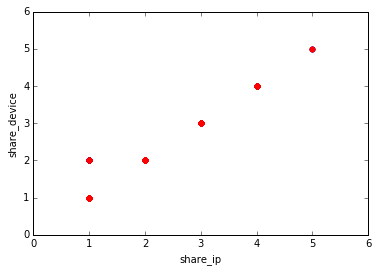

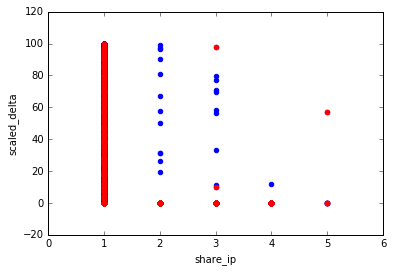

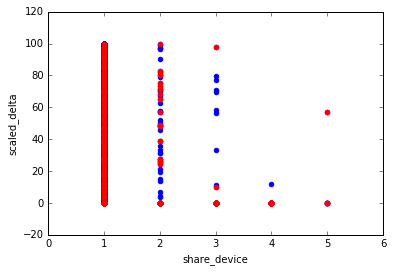

In [631]:
import matplotlib.pyplot as plt
%matplotlib inline
dfeatures=['class','share_ip','share_device','scaled_delta']
def drawXY(df,dfeatures):
    n=len(df)
    X=df[dfeatures[1]]
    Y=df[dfeatures[2]]
    rind = np.nonzero(df[dfeatures[0]])[0]
    plt.scatter(X,Y,color='blue')
    plt.scatter(X[rind],Y[rind],color='red') # if fraud, label red
    plt.xlabel(dfeatures[1])
    plt.ylabel(dfeatures[2])
    plt.show()

drawXY(df_cleaned,dfeatures)
dfeatures1=['class','share_ip','scaled_delta']
drawXY(df_cleaned,dfeatures1)
dfeatures2=['class','share_device','scaled_delta']
drawXY(df_cleaned,dfeatures2)

Classifier Selection: 
---------------------


In [632]:
df_cleaned.head()

,purchase_value,age,class,delta,share_device,share_ip,sex_F,sex_M,source_Ads,source_Direct,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Viet Nam,scaled_delta
0,25,30,0,6913932.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.690978
1,42,49,0,2587789.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.961503
2,26,26,0,4326359.0,1,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.731548
3,44,26,0,8301137.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.071796
4,80,21,0,8123222.0,1,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,78.355649


In [633]:
labels = df_cleaned['class'].copy(deep=True).astype(int).as_matrix()
features = df_cleaned.drop('class',axis=1).copy(deep=True).as_matrix() 
features_list =list(df_cleaned.columns.values)
print "features:\t", df_cleaned.columns.values
print 'number of features:\t',features.shape


features:	[u'purchase_value' u'age' u'class' u'delta' u'share_device' u'share_ip'
 u'sex_F' u'sex_M' u'source_Ads' u'source_Direct' u'source_SEO'
 u'browser_Chrome' u'browser_FireFox' u'browser_IE' u'browser_Opera'
 u'browser_Safari' u'country_Albania' u'country_Algeria' u'country_Angola'
 u'country_Argentina' u'country_Australia' u'country_Austria'
 u'country_Bahrain' u'country_Bangladesh' u'country_Barbados'
 u'country_Belarus' u'country_Belgium' u'country_Benin' u'country_Bolivia'
 u'country_Bosnia and Herzegowina' u'country_Botswana' u'country_Brazil'
 u'country_Brunei Darussalam' u'country_Bulgaria' u'country_Canada'
 u'country_Cayman Islands' u'country_Chile' u'country_China'
 u'country_Colombia' u'country_Costa Rica' u"country_Cote D'ivoire"
 u'country_Croatia (LOCAL Name: Hrvatska)' u'country_Curacao'
 u'country_Cyprus' u'country_Czech Republic' u'country_Denmark'
 u'country_Dominican Republic' u'country_Ecuador' u'country_Egypt'
 u'country_El Salvador' u'country_Estonia' u'cou

In [640]:
print features.shape[1]

141


In [634]:
# target_feature = ['share_device','share_ip','scaled_delta']
# df_target_features = df_cleaned[['share_device','share_ip','scaled_delta']]
# features = df_target_features.copy(deep=True).astype(int).as_matrix()

# print 'target feature list :\t', df_target_features.columns.values

**PCA and Adaboost**

In [653]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

def scorer(estimator,features_test,labels_test):
    labels_pred = estimator.predict(features_test)
    pre=precision_score(labels_test,labels_pred)
    rec=recall_score(labels_test,labels_pred)
    if pre > 0.3 and rec > 0.3:
        return f1_score(labels_test,labels_pred) 
    return 0

ada = AdaBoostClassifier()
pca = PCA()
pipe = Pipeline(steps=[('pca',pca),('ada',ada)])
sk_fold =StratifiedShuffleSplit(labels,n_iter=100,test_size=0.2)
param_grid=[{'pca__n_components': [141],'pca__whiten':[True],'ada__n_estimators':[5,10],'ada__learning_rate':[0.1,0.5,1,1.5,2]}]
ada_clf = GridSearchCV(pipe,param_grid,cv=sk_fold,scoring= scorer)
ada_clf.fit(features,labels)
print "Best parameters set found on estimators:", ada_clf.best_params_
print "Best estimators:",ada_clf.best_estimator_
print "Best score:",ada_clf.best_score_

LinAlgError: SVD did not converge

In [ ]:
print len(train_index)
print len(test_index)

In [ ]:
from sklearn.metrics import classification_report
for train_index, test_index in sk_fold:
    features_train,features_test = features[train_index],features[test_index]
    labels_train,labels_test = labels[train_index],labels[test_index]
    
y_true = labels_test
y_pred = ada_clf.predict(features_test)
target_names = ['no_fraud','fraud']
print classification_report(y_true,y_pred,target_names=target_names)
#print 'F1 value',ada_clf.score(features_test,labels_test)
#print 'ada_label_pred=',len(ada_clf.predict(features_test))

In [ ]:
# #Precision of Adaboost
# from sklearn.metrics import precision_score
# ada_label_pred=ada_clf.fit(features_train,labels_train).predict(features_test)
# ada_precision= precision_score(labels_test,ada_label_pred)
# print 'ada_precision is:',ada_precision
# #Recall of Adaboost
# from sklearn.metrics import recall_score
# ada_recall=recall_score(labels_test,ada_label_pred)
# print 'ada_recall is:',ada_recall

**ROC curve**

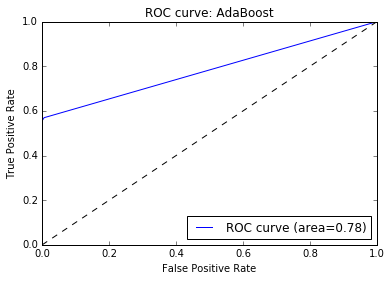

In [729]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import train_test_split
# shuffle and split training and test sets
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)
#learn to predict each class against the other
ada_clf= AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,learning_rate=0.1, n_estimators=5, random_state=None)
ada_y_score=ada_clf.fit(features_train,labels_train).predict_proba(features_test)[:,1]
#print features_test.shape
#print ada_y_score.shape
#print ada_clf.fit(features_train,labels_train).predict_proba(features_test)
#compute ROC curve and ROC area
ada_fpr,ada_tpr,ada_thresholds=roc_curve(labels_test,ada_y_score)
ada_roc_auc=auc(ada_fpr,ada_tpr)
#plot of a ROC curve for a specific class
plt.figure()
plt.plot(ada_fpr,ada_tpr,label='ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AdaBoost')
plt.legend(loc='lower right')
plt.show()

**Adaboost**

In [730]:
#Accuracy of AdaBoost
ada_accu=ada_clf.score(features_test,labels_test)
print 'ada_accuracy is:',ada_accu
#Precision of Adaboost
from sklearn.metrics import precision_score
ada_label_pred=ada_clf.fit(features_train,labels_train).predict(features_test)
ada_precision= precision_score(labels_test,ada_label_pred)
print 'ada_precision is:',ada_precision
#Recall of Adaboost
from sklearn.metrics import recall_score
ada_recall=recall_score(labels_test,ada_label_pred)
print 'ada_recall is:',ada_recall

ada_accuracy is: 0.961023851076
ada_precision is: 1.0
ada_recall is: 0.556291390728


In [ ]:
# # decision tree and feature importances
# from sklearn.tree import DecisionTreeClassifier
# def SelectImportances(features,labels):
#     clf = DecisionTreeClassifier(random_state=0)
#     clf = clf.fit(features,labels)
#     importances = clf.feature_importances_
#     imp=zip(features_list,importances)
#     imps=sorted(imp,key=lambda x: x[1],reverse=True)
#     return imps

# SelectImportances(features,labels)

In [ ]:

# # feature_importances with forests of trees
# from sklearn.ensemble import ExtraTreesClassifier

# def SelectImportances2(features,labels):
#     forest = ExtraTreesClassifier(n_estimators = 50,random_state=0)
#     forest = forest.fit(features,labels)
#     importances = forest.feature_importances_
#     imp=zip(features_list,importances)
#     imps=sorted(imp,key=lambda x: x[1],reverse=True)
    
#     std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
#     indices = np.argsort(importances)[::-1] # reverse sort, decending    
#     # Print the feature ranking
#     print "Feature ranking:"
#     for f in range(features.shape[1]):
#         print "%d. feature %d(%f)" % (f+1, indices[f], importances[indices[f]])
#     #plot the feature importances of the forest
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(features.shape[1]),importances[indices],color='r',yerr=std[indices],align='center')
#     plt.xticks(range(features.shape[1]),indices)
#     plt.xlim([-1,features.shape[1]])
#     plt.show()
#     return imps
# SelectImportances2(features,labels)